<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

**Integrantes:**
Carla Rosetti, 
Juliana Benitez,
Pablo Roldan

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [0]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [0]:
seaborn.__version__

'0.9.0'

In [0]:
dataset = pandas.read_csv('https://raw.githubusercontent.com/DiploDatosFamaf/ProyectoAnalisisyVisualizacion/master/hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [0]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [0]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [0]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  
  

In [0]:

df_latinoam = dataset.loc[dataset["region"] == "Latin America & the Caribbean"]
ltcaribe = df_latinoam

variables = [col for col in dataset.columns if 'pf_identity' in col]
variables += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

def calculoRango (variables,df):
    for var in variables:
        maximo = df[var].max()
        minimo = df[var].min()
        rango = maximo - minimo
        print ("el rango de ",var,rango,"   maximo: ",maximo,"  minimo: ",minimo)

print ("Rango de variales para Latinoamerica")
calculoRango(variables,df_latinoam)
print ("\n")
print ("Rango de variales para el Mundo")
calculoRango(variables,dataset)

mundo_d = dataset['pf_identity'].dropna().describe()
ltcaribe = dataset[(dataset['region'] == 'Latin America & the Caribbean')]
lt_caribe_d = ltcaribe['pf_identity'].dropna().describe()
pf_id_pf_identity = pandas.concat([mundo_d, lt_caribe_d], axis = 1)
pf_id_pf_identity.columns = ['mundo' , 'ltamerica_y_caribe']
#pf_id_pf_identity

mundo_d = dataset['hf_score'].dropna().describe()
ltcaribe = dataset[(dataset['region'] == 'Latin America & the Caribbean')]
lt_caribe_d = ltcaribe['hf_score'].dropna().describe()
pf_id_hf_score = pandas.concat([mundo_d, lt_caribe_d], axis = 1)
pf_id_hf_score.columns = ['mundo' , 'ltamerica_y_caribe']
#pf_id_hf_score

print ("\n"*2)
print("Media, mediana y desviación estándar de pf_identity Mundo y Latam")
print ("\n")
print (pf_id_pf_identity)
print ("\n"*3)
print("Media, mediana y desviación estándar de hf_score Mundo y Latam")
#pf_id_hf_score.reset_index()
print ("\n")
print (pf_id_hf_score)



Rango de variales para Latinoamerica
el rango de  pf_identity_legal 10.0    maximo:  10.0   minimo:  0.0
el rango de  pf_identity_parental_marriage 10.0    maximo:  10.0   minimo:  0.0
el rango de  pf_identity_parental_divorce 10.0    maximo:  10.0   minimo:  0.0
el rango de  pf_identity_parental 10.0    maximo:  10.0   minimo:  0.0
el rango de  pf_identity_sex_male 10.0    maximo:  10.0   minimo:  0.0
el rango de  pf_identity_sex_female 10.0    maximo:  10.0   minimo:  0.0
el rango de  pf_identity_sex 10.0    maximo:  10.0   minimo:  0.0
el rango de  pf_identity_divorce 0.0    maximo:  10.0   minimo:  10.0
el rango de  pf_identity 5.0    maximo:  10.0   minimo:  5.0
el rango de  ef_score 5.03    maximo:  7.91   minimo:  2.88
el rango de  ef_rank 154.0    maximo:  162.0   minimo:  8.0
el rango de  hf_score 4.089427871000001    maximo:  8.290152327000001   minimo:  4.2007244560000006
el rango de  hf_rank 142.0    maximo:  161.0   minimo:  19.0


Rango de variales para el Mundo
el rango 

9.126312939

2. Para la  variable **hf_score** nos resulta difícil calcular pues tiene una precisión de 6 decimales. Deberíamos tomar intevalos para obtener el intevalo modal.
Para el caso de **pf_identity** los valores registrados son 7, 7.5 ó 10. Su moda es 10. En este caso, puesto que son valores máximo y mediano coinciden en 10,  la moda no provee mayor información.


In [0]:
#Cálculo de la moda para pf_identity

dataset_nuevo = dataset["pf_identity"]
dataset_nuevo.mode()


0    10.0
dtype: float64

In [0]:
#Cálculo de la moda para hf_score

dataset_nuevo = dataset["hf_score"]
dataset_nuevo.mode()

0       3.765827
1       3.910826
2       4.023595
3       4.095028
4       4.200724
5       4.203442
6       4.241750
7       4.253278
8       4.258014
9       4.310283
10      4.432118
11      4.441783
12      4.513248
13      4.560686
14      4.563809
15      4.573730
16      4.629535
17      4.710594
18      4.775506
19      4.779236
20      4.803024
21      4.807277
22      4.810664
23      4.811136
24      4.812705
25      4.823528
26      4.829057
27      4.842482
28      4.866653
29      4.887965
          ...   
1348    8.686020
1349    8.687174
1350    8.715262
1351    8.719553
1352    8.760105
1353    8.774437
1354    8.776840
1355    8.777166
1356    8.784639
1357    8.787759
1358    8.791730
1359    8.792258
1360    8.797717
1361    8.806932
1362    8.814458
1363    8.818141
1364    8.857581
1365    8.868585
1366    8.876890
1367    8.879077
1368    8.887410
1369    8.892456
1370    8.910542
1371    8.921386
1372    8.971815
1373    8.999086
1374    9.027891
1375    9.0284

4. Los datos no pueden curarse pues los datos faltantes no son promediables.
Una forma eventual de llenar algún dato faltante para un país podrían emplearse (si hubiere) datos de años previos y asignarles la tendencia observada.

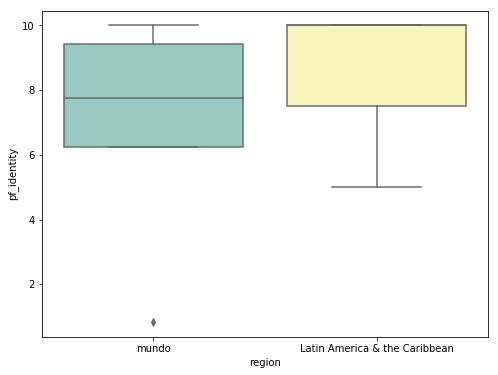

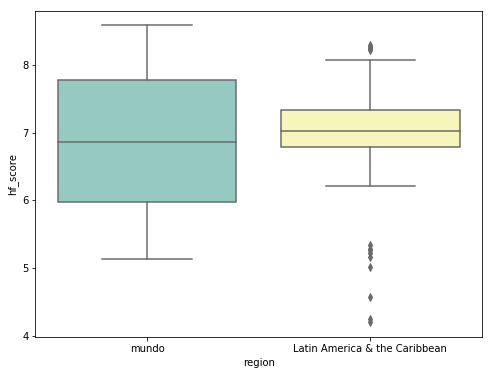

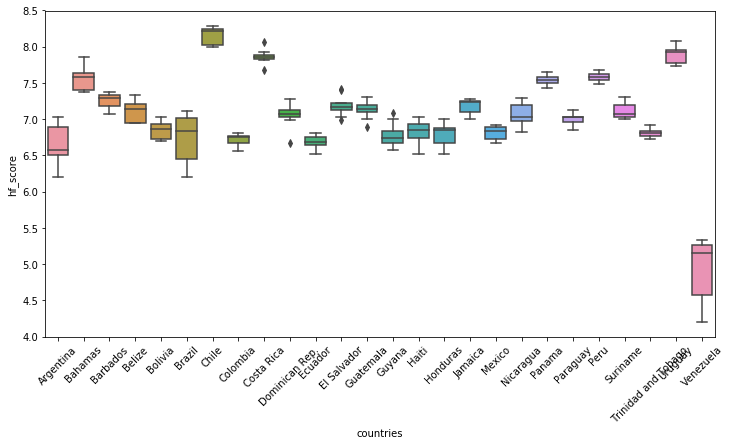

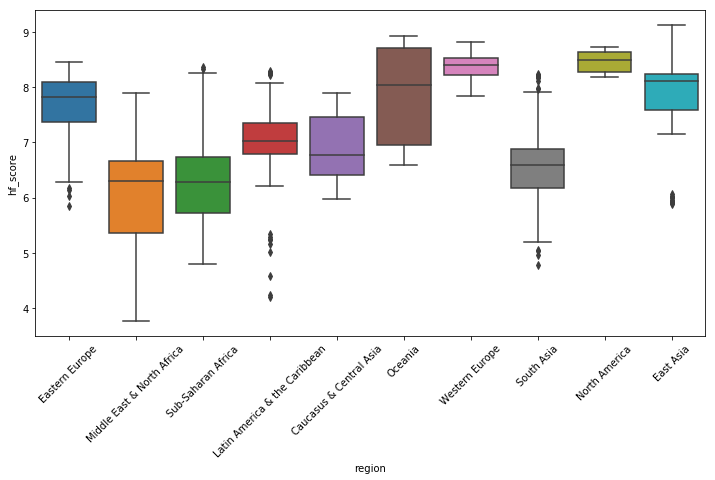

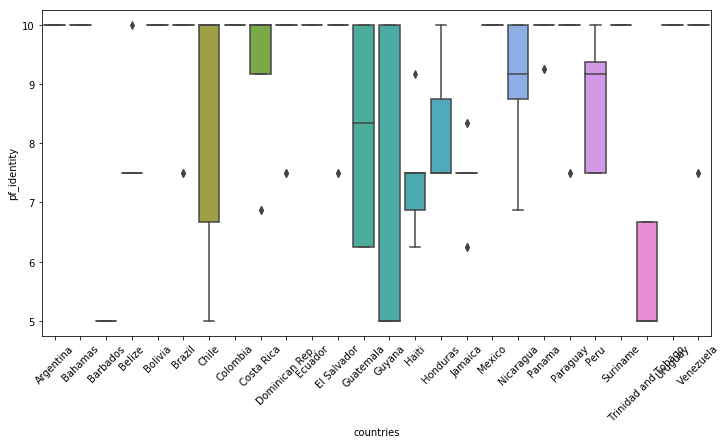

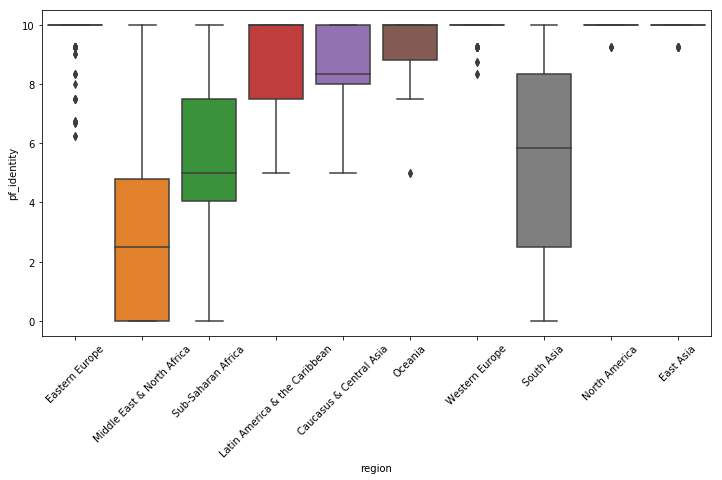

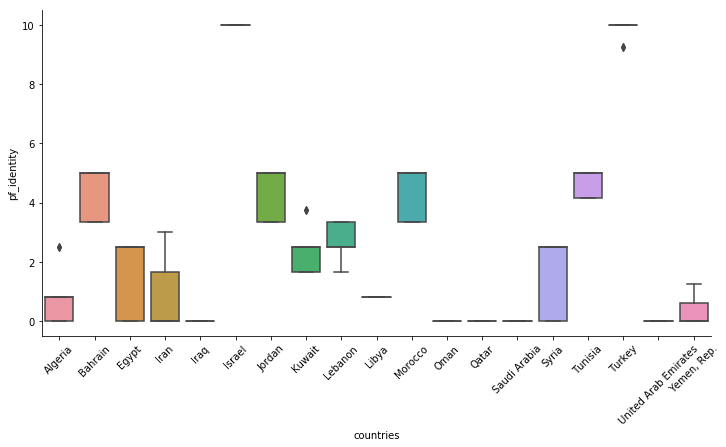

In [0]:
reg_mundo = [ 'mundo' for x in mundo_d ]
regmundo_series = pandas.Series(reg_mundo)

l_mundo = pandas.concat([dataset['pf_identity'],dataset['hf_score'], regmundo_series], axis = 1)
l_mundo = l_mundo.rename(columns = {0:'region'})

pfhf_new = pandas.concat([l_mundo, dataset[(dataset['region'] == 'Latin America & the Caribbean')]
                        [['region', 'pf_identity', 'hf_score']]], axis = 0, sort=True)
#pf_new
plt.figure(figsize=(8,6))
ax = seaborn.boxplot(x='region', y='pf_identity', data = pfhf_new, palette="Set3")
#seaborn.despine()
plt.figure(figsize=(8,6))
ax = seaborn.boxplot(x='region', y='hf_score', data = pfhf_new, palette="Set3")
#seaborn.despine()
plt.figure(figsize=(12,6))
ax = seaborn.boxplot(x = 'countries' , y = 'hf_score' ,
                     data = dataset[(dataset['region'] == 'Latin America & the Caribbean')])
plt.xticks(rotation=45)
plt.figure(figsize=(12,6))
ax = seaborn.boxplot(x = 'region' , y = 'hf_score' ,
                     data = dataset)
plt.xticks(rotation=45)
#plt.
plt.figure(figsize=(12,6))
ax = seaborn.boxplot(x = 'countries' , y = 'pf_identity' ,
                     data = dataset[(dataset['region'] == 'Latin America & the Caribbean')])
plt.xticks(rotation=45)
plt.figure(figsize=(12,6))
ax = seaborn.boxplot(x = 'region' , y = 'pf_identity' ,
                     data = dataset)
plt.xticks(rotation=45)
plt.figure(figsize=(12,6))
ax = seaborn.boxplot(x = 'countries' , y = 'pf_identity' ,
                     data = dataset[(dataset['region'] == 'Middle East & North Africa')])
plt.xticks(rotation=45)
seaborn.despine()



5.  Si existen outliers en pf_identity a nivel mundial y en el pf_score para región de Latinoamérica y el Caribe.


Para detectarlos se emplea el diagrama de cajas porque provee una rápida visualización.

¿Los outliers, son globales o por grupo? 

A nivel global, entendido como a nivel mundial, los outliers aparecen sólo para pf_identity. 
Para cada región existen varios, especialmente en Europa del Este.
Para hf_score, no hay outliers mundiales, pero cada región presenta varios. Especialmente Latinoamerica y el Carible

¿Los eliminaría del conjunto de datos?

No deberían eliminarse porque éstos reflejan la realidad de estas naciones en particular. Puesto que el objetivo es mostrar cuál es la situación de las libertades humanas en cada parte del globo.

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

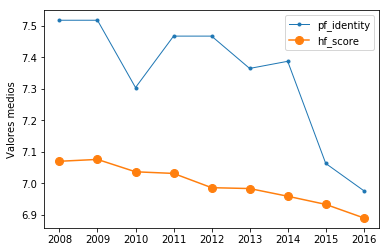

In [0]:
# 1. Grafiquen la media de la variable pf_identity y hf_score a través de los años.
df_pf_identity_mean=dataset.groupby(['year'])[['pf_identity']].mean()
df_hf_score_mean=dataset.groupby(['year'])[['hf_score']].mean()

fig, ax = plt.subplots()
ax.plot(df_pf_identity_mean.loc[2008:2016, 'pf_identity'],marker='.', linestyle='-', linewidth=1, label='pf_identity')
ax.plot(df_hf_score_mean.loc[2008:2016, 'hf_score'],marker='o', markersize=8, linestyle='-', label='hf_score')

ax.set_ylabel('Valores medios')
ax.legend()




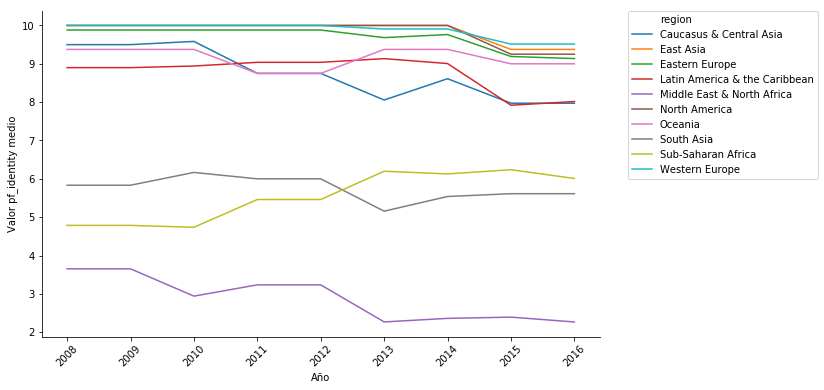

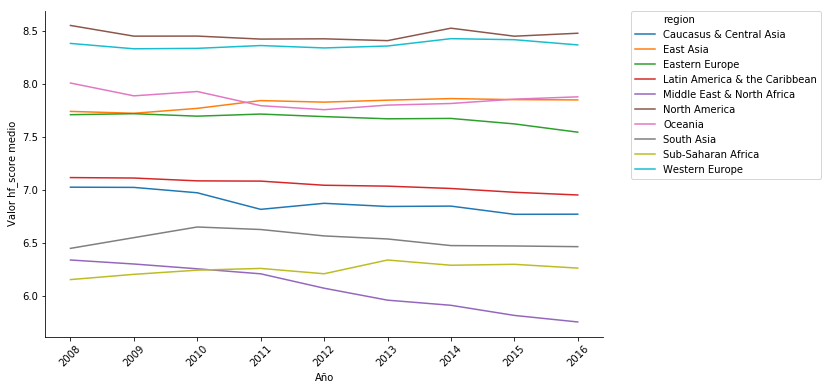

In [0]:
# 2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). 
# ¿La tendencia observada, es la misma que si no dividimos por regiones?
# Para el caso hf_score, se observa que en general la tendencia es paralela (con una ligera caída en el tiempo) 
# para todas las regiones con excepción de Middle East and North Africa, que tiene un descenso mayor.
# y una caída menos pronunciada en Europa del Este.
#--------------------------------------------------------------------------

df_pf_identity_mean=dataset.groupby(['year','region'])[['pf_identity']].mean()
df_pf_identity_mean=df_pf_identity_mean.reset_index()
#df_pf_identity_mean

plt.figure(figsize=(10,6))
seaborn.lineplot(data=df_pf_identity_mean , x='year', y='pf_identity', hue='region', ci='sd')
plt.ylabel('Valor pf_identity medio')
plt.xlabel('Año')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

#--------------------------------------------------------------------------

df_hf_score_mean=dataset.groupby(['year','region'])[['hf_score']].mean()
df_hf_score_mean=df_hf_score_mean.reset_index()
#df_hf_score_mean

plt.figure(figsize=(10,6))
seaborn.lineplot(data=df_hf_score_mean , x='year', y='hf_score', hue='region', ci='sd')
plt.ylabel('Valor hf_score medio')
plt.xlabel('Año')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()




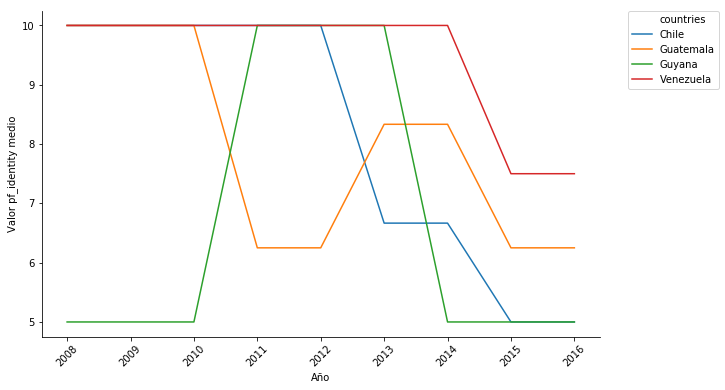

In [0]:
# 3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable pf_identity en la región. 
# ¿Cómo seleccionarion los países relevantes a esa tendencia?

# Para la selección de los países se consideran en primer lugar son Venezuela y Chile que claramente se encuentran en los extremos de la variabe hf_score, 
# como surge de la inspección visual de los gráficos de caja.
# Pero respecto a la variable pf_identity, tomando como informacion los gráficos de caja, se considerarán además los países que tuviernon 
# una mayor disperción de sus valores, como Guatemala y Guyana
# Este grupo de países sigue individualmente el mismo andar de la curva corresondiente a su región: una marcada tendencia a caer en los años próximos.
#--------------------------------------------------------------------------

ltcaribe_pf_identity_mean=ltcaribe.groupby(['year','countries'])[['pf_identity']].mean()
ltcaribe_pf_identity_mean=ltcaribe_pf_identity_mean.reset_index()

ltcaribe_pf_identity_mean=ltcaribe_pf_identity_mean.loc[ltcaribe_pf_identity_mean['countries'].isin (["Chile","Venezuela","Guatemala","Guyana"])]
ltcaribe_pf_identity_mean

plt.figure(figsize=(10,6))
seaborn.lineplot(data=ltcaribe_pf_identity_mean , x='year', y='pf_identity', hue='countries', ci='sd')
plt.ylabel('Valor pf_identity medio')
plt.xlabel('Año')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()


## 2. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. [opcional] Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

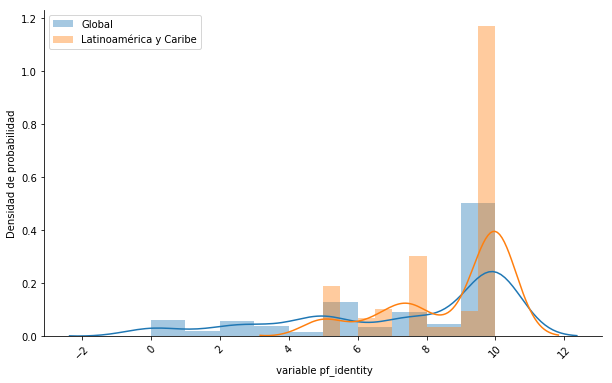

In [0]:
plt.figure(figsize=(10,6))
seaborn.distplot(dataset['pf_identity'].dropna(),bins=10, label='Global')
#
seaborn.distplot(dataset.loc[dataset['region'] =='Latin America & the Caribbean',['pf_identity']].dropna(),bins=10,label='Latinoamérica y Caribe')
plt.xticks(rotation=45)
plt.ylabel('Densidad de probabilidad')
plt.xlabel(' variable pf_identity')
plt.legend()
seaborn.despine()

Para la variable *pf_identity*, la distribucion en los datos tanto globales como para Latinoamérica y el Caribe,
se encuentra muy sesgada hacia la derecha y de aspecto bimodal, se ve  un segundo pico modal  destacable en Latinoamérica en valores cercanos a 8.
Para la variable *hf_score* la distribucion de los datos globales puede asemejarse a una distribucion bimodal, mientras que en Latinoamérica la curtosis es mayor, más apuntada y con colas más gruesas que la normal


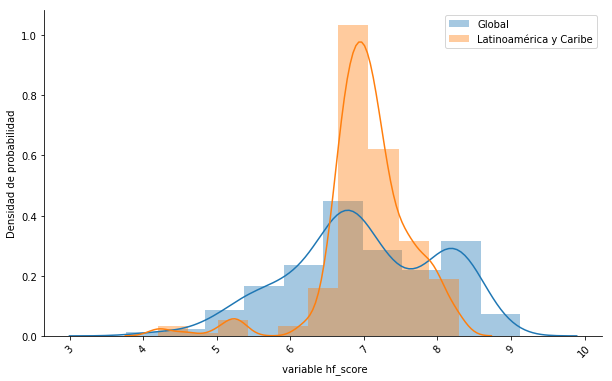

In [0]:
plt.figure(figsize=(10,6))
seaborn.distplot(dataset['hf_score'].dropna(),bins=10, label='Global')

seaborn.distplot(dataset.loc[dataset['region'] == 'Latin America & the Caribbean',['hf_score']].dropna(),bins=10, label='Latinoamérica y Caribe')
plt.xticks(rotation=45)
plt.ylabel('Densidad de probabilidad')
plt.xlabel(' variable hf_score')
plt.legend()
seaborn.despine()

Calculos de prueba de *Kolmogorov-Smirnov* para las variables sin estandarizar respecto a una distribucion normal

In [0]:
from scipy import stats
stats.kstest(dataset['pf_identity'].dropna(), 'norm')

KstestResult(statistic=0.9146901895363428, pvalue=0.0)

In [0]:
from scipy import stats
stats.kstest(dataset['hf_score'].dropna(), 'norm')

KstestResult(statistic=0.9999170006054449, pvalue=0.0)

Si los datos se estandarizan, entonces tendran media = 0 y desvio estandar =1

In [0]:
pf_promedio, pf_sd = stats.norm.fit(dataset['pf_identity'].dropna())
hf_promedio, hf_sd = stats.norm.fit(dataset['hf_score'].dropna())
pfstan = (dataset['pf_identity'].dropna() - pf_promedio) / pf_sd
hfstan = (dataset['hf_score'].dropna() - hf_promedio) / hf_sd   

In [0]:
from scipy import stats
stats.kstest(pfstan, 'norm')

KstestResult(statistic=0.2368216885475004, pvalue=1.7837097494493251e-68)

In [0]:
from scipy import stats
stats.kstest(hfstan, 'norm')

KstestResult(statistic=0.06606589707833843, pvalue=1.1309978419994058e-05)

Para ambas variables, ya sea tanto con los datos crudos y estandarizados, los valores de p son significativos, con lo cual se rechaza la hipotesis nula de que pertencen a una distribucion normal


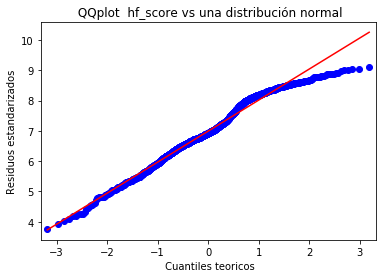

In [0]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(dataset['hf_score'].dropna(), line='s')
plt.title(' QQplot  hf_score vs una distribución normal')                        
plt.ylabel('Residuos estandarizados')
plt.xlabel(' Cuantiles teoricos')
pyplot.show()

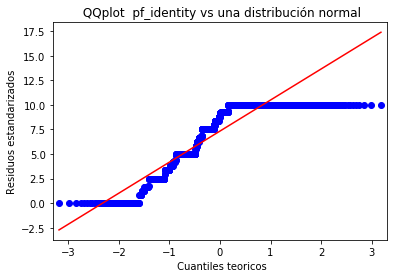

In [0]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(dataset['pf_identity'].dropna(), line='s')
plt.title(' QQplot  pf_identity vs una distribución normal')                        
plt.ylabel('Residuos estandarizados')
plt.xlabel(' Cuantiles teoricos')
pyplot.show()

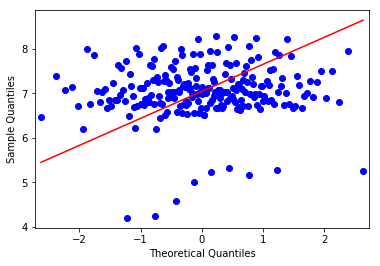

In [0]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(dataset.loc[dataset['region'] == 'Latin America & the Caribbean',['hf_score']].dropna(), line='s')
pyplot.show()


Skewness(o asimetría) y Curtosis en datos globales

In [0]:
skewness_pf_identity = stats.skew (dataset['pf_identity'].dropna())
skewness_hf_score = stats.skew (dataset['hf_score'].dropna())



curtosis_pf_identity = stats.kurtosis(dataset['pf_identity'].dropna())
curtosis_hf_score = stats.kurtosis(dataset['hf_score'].dropna())


print ('Skewness de pf_identity: ' , skewness_pf_identity )
print ('Skewness de hf_score: ' , skewness_hf_score )
####

###
print ('Curtosis de pf_identity: ' , curtosis_pf_identity)
print ('Curtosis de hf_score: ' , curtosis_hf_score)

Skewness de pf_identity:  -0.9121780542847563
Skewness de hf_score:  -0.21205190437691196
Curtosis de pf_identity:  -0.4148322234251629
Curtosis de hf_score:  -0.5101904315124792


Los valores de Asimetría son negativos para ambos grupos analizados. El mayor valor es en la variable *pf_identity* para el grupo global donde es -0.91, su alto valor indica mayor asimetria que en la variable hf_score, y en ambos, los valores negativo indican
un sesgo hacia la izquierda.
Respecto a la curtosis, ambos valores son negativos con lo cual ambas distribuciones estan mas achatadas que una distibución normal.
El grafico QQ puede proveer la informacion sobre los puntos que se alejan de la distribucion, para identificarlos y definir si tomarlos como outliers



## 3. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


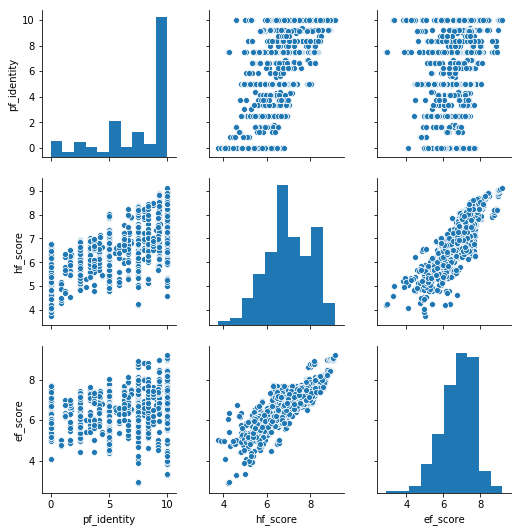

In [0]:
# HICE LOS TESTS DE CORRELACION USANDO TODOS LOS VALORES Y NO LAS MEDIAS POR PAÍS, CALCULADAS SOBRE EL 
# PERÍODO DE AÑOS. ME SUENA QUE PUEDE ESTAR PONDERANDO EN LA CORRELACION OTRAS CARACTERÍSTICAS O 
# VARIABLES PROPIAS DEL PAÍS QUE NO SON LAS QUE MIDEN LAS VARIABLES DE INTERÉS. EN ESTE CASO COMO 
# PARA TODOS TOMO IGUAL CANTIDAD DE PUNTOS (AÑOS) CAPAZ QUE NO IMPORTA PERO NO SÉ SI ES CORRECTO. POR OTRO
# LADO SI EXISTE UNA CORRELACION ENTRE LAS VARIABLES Y ESO SE MANIFIESTA EN LA SECUENCIA TEMPORAL PUEDE
# SER QUE SE SUAVICE AL TOMAR LOS PROMEDIOS. --- 

#¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables?
#¿Es adecuado para los valores de pf_identity? ¿Por qué?
seaborn.pairplot(dataset, vars=["pf_identity", "hf_score", "ef_score"])
#el scatterplot está de hecho tratando ambas variables como continuas, y pf_identity tiene características
#de variable discreta. Por eso no hay una nube de puntos, sino distribuciones asociadas a determinados valores.
# Quizás es mejor para este caso hacer los jitter plot o stripplot o simil
#(https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn-stripplot) para que no se 
# superpongan los valores (de hecho deben estar todos superpuestos en pf_identity = 10 que es el más frecuente impidiendo una óptima visualización.
# Se observa que existe correlación entre las variables hf_score y ef_score.
# Con estos gráficos es difícil decir si existe correlación entre pf_identity con hf_score y ef_score (como dijimos la superposicion de puntos impide afirmarlo). 
# 

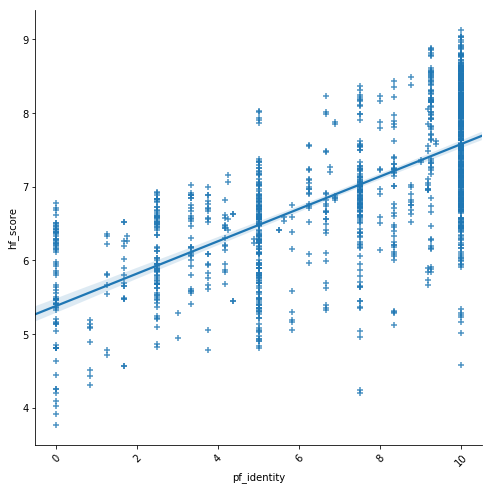

In [0]:
#Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. 
#Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado 
#de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
plt.figure(figsize=(8,8))
seaborn.regplot(data=dataset,
                x='pf_identity', y='hf_score',
                marker='+')
plt.xticks(rotation=45)
seaborn.despine()

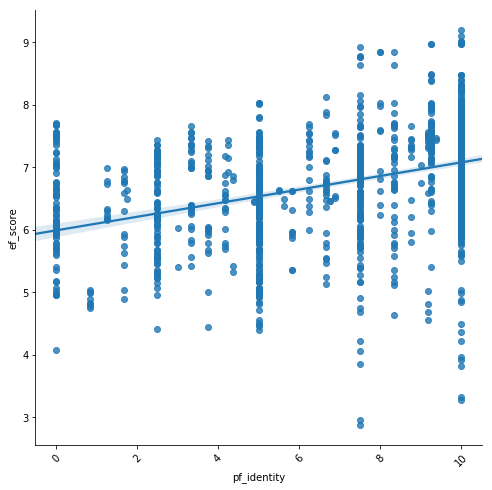

In [0]:
plt.figure(figsize=(8,8))
seaborn.regplot(data=dataset,
                x='pf_identity', y='ef_score',
                marker='o')
plt.xticks(rotation=45)
seaborn.despine()


Se observa una correlación entre **pf_identity** y **hf_score** lo cual era esperable porque la variable **pf_identity** se usa para el cálculo de **hf_score**.
También se nota una correlación (leve) entre **pf_identity** y **ef_score**. En este caso aunque existe una correlación no implica cuasalidad. Es decir, una mayor libertad económica no conduce necesariamente a una mayor libertad de identidad.


In [120]:
## calculate spearman's correlation
from scipy import stats
coef, p = stats.spearmanr(dataset['pf_identity'].dropna(), dataset['hf_score'].dropna())
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)


Spearmans correlation coefficient: 0.686
Samples are correlated (reject H0) p=0.000


In [122]:
from scipy import stats
coef, p = stats.spearmanr(dataset['pf_identity'].dropna(), dataset['ef_score'].dropna())
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.427
Samples are correlated (reject H0) p=0.000


Conclusiones: existe una correlación positiva entre pf_identity y hf_score, y con ef_score.
Esa correlación es mayor (cerca de 70% con hf_score), y bastante más leve con ef_score. 
Correlaciones positivas existen entre las libertades de identidad y humanas y no tantas con las libertades económicas.